<a href="https://colab.research.google.com/github/dmarx/notebooks/blob/main/DtD_Karlo_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
# @title Setup

########################
# install dependencies #
########################

!pip install diffusers["torch"] transformers ftfy accelerate

##############
# load model #
##############

# using the official huggingface space as a base to build on:
# - https://huggingface.co/spaces/kakaobrain/karlo/blob/main/app.py

# parameters exposed in the pipeline __call__ method
# - https://github.com/huggingface/diffusers/blob/main/src/diffusers/pipelines/unclip/pipeline_unclip.py#L245-L262

import torch
from diffusers import UnCLIPPipeline

pipe = UnCLIPPipeline.from_pretrained("kakaobrain/karlo-v1-alpha", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

##########################
# setup helper functions #
##########################


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

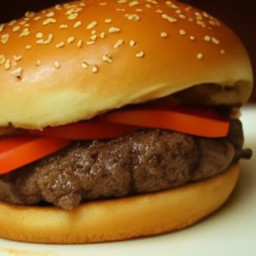

In [ ]:
# @title Generate images

############
# settings #
############

# help(pipe.__call__)

# @markdown **prompt (`str` or `List[str]`):**
# @markdown    The prompt to guide the image generation.
prompt = 'a photo of a delicious cheeseburger' # @param {kind:'string'}

# @markdown **num_images_per_prompt (`int`, *optional*, defaults to 1):**
# @markdown    The number of images to generate per prompt.
num_images_per_prompt = 1 # @param {kind:'int'}

# @markdown **prior_num_inference_steps (`int`, *optional*, defaults to 25):**
# @markdown    The number of denoising steps for the prior. More denoising steps usually lead to a higher quality
# @markdown    image at the expense of slower inference.
prior_num_inference_steps = 25 # @param {kind:'int'}

# @markdown **decoder_num_inference_steps (`int`, *optional*, defaults to 25):**
# @markdown    The number of denoising steps for the decoder. More denoising steps usually lead to a higher quality
# @markdown    image at the expense of slower inference.
decoder_num_inference_steps = 25 # @param {kind:'int'}

# @markdown **super_res_num_inference_steps (`int`, *optional*, defaults to 7):**
# @markdown    The number of denoising steps for super resolution. More denoising steps usually lead to a higher
# @markdown    quality image at the expense of slower inference.
super_res_num_inference_steps = 7 # @param {kind:'int'}

# @markdown **prior_guidance_scale (`float`, *optional*, defaults to 4.0):**
# @markdown    Guidance scale as defined in [Classifier-Free Diffusion Guidance](https://arxiv.org/abs/2207.12598).
# @markdown    `guidance_scale` is defined as `w` of equation 2. of [Imagen
# @markdown    Paper](https://arxiv.org/pdf/2205.11487.pdf). Guidance scale is enabled by setting `guidance_scale >
# @markdown    1`. Higher guidance scale encourages to generate images that are closely linked to the text `prompt`,
# @markdown    usually at the expense of lower image quality.
prior_guidance_scale = 4.0 # @param {kind:'number'}

# @markdown **decoder_guidance_scale (`float`, *optional*, defaults to 4.0):**
# @markdown    Guidance scale as defined in [Classifier-Free Diffusion Guidance](https://arxiv.org/abs/2207.12598).
# @markdown    `guidance_scale` is defined as `w` of equation 2. of [Imagen
# @markdown    Paper](https://arxiv.org/pdf/2205.11487.pdf). Guidance scale is enabled by setting `guidance_scale >
# @markdown    1`. Higher guidance scale encourages to generate images that are closely linked to the text `prompt`,
# @markdown    usually at the expense of lower image quality.
decoder_guidance_scale = 4.0 # @param {kind:'number'}

# @markdown **seed:** Set to a non-negative value for deterministic generation.
seed = -1 # @param {kind:'number'}

# generator (`torch.Generator`, *optional*):
#     One or a list of [torch generator(s)](https://pytorch.org/docs/stable/generated/torch.Generator.html)
#     to make generation deterministic.

user_settings = dict(
    prompt=prompt,
    num_images_per_prompt=num_images_per_prompt,
    prior_num_inference_steps=prior_num_inference_steps,
    decoder_num_inference_steps=decoder_num_inference_steps,
    super_res_num_inference_steps=super_res_num_inference_steps,
    prior_guidance_scale=prior_guidance_scale,
    decoder_guidance_scale=decoder_guidance_scale,
)

############
# Generate #
############

import random

if seed < 0:
  seed = [random.randrange(0, 4294967295)]

print("Using seed: {seed}")
torch.manual_seed(seed)

images = pipe(**user_settings).images

for im in images:
  display(im)